# Лабораторна робота №5
## Тема: Transfer Learning
### Завдання
1. Виконати вирішення задачs класифікації для 3 класів з набору даних food101 з використанням різних моделей нейронних мереж:
  1.1 CNN модель з лабораторної роботи 4
  1.2 Resnet модель
  1.3 Efficientnet модель (моделі 1.1-1.3 з використанням оптимізатора Adam)
  1.4 (1.5) Моделі 1.2,1.3 з використанням оптимізатора SGD.
  1.6 (1.7) Моделі 1.2,1.3 отримані за допомогою tf.keras.applications та треновані з використанням fine-tuning (останні 10 шарів)
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи
3. Порівняти результати моделювання із використанням TensorBoard
4. Графік(и) порівняння результатів завантажити у форматі .svg та вставити у підсумковий файл поряд із та відповідними висновками
5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab5).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

## Виконала
### студентка 4 курсу
### групи АнД-41
### Кліменкова Ніна
### Варіант 7

## Бібліотеки

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show
import random
import os
import time
import pathlib
import pandas as pd
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
for dirpath, dirnames, filenames in os.walk("train_copy/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 1 images in 'train_copy/'.
There are 0 directories and 75 images in 'train_copy/beet_salad'.
There are 0 directories and 75 images in 'train_copy/escargots'.
There are 0 directories and 75 images in 'train_copy/mussels'.


## Мої класи згідно варіанту - 6, 36, 66

In [16]:
data_dir = pathlib.Path("train_copy/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'beet_salad' 'escargots' 'mussels']


## Випадкова картинка
### Виводимо картинки із наборів даних, щоб зрозуміти з чим ми маємо справу

In [17]:
def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (512, 382, 3)


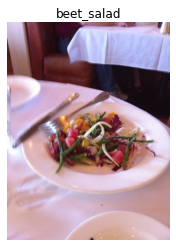

In [18]:
img = view_random_image(target_dir="train_copy/",
                        target_class="beet_salad")

## cnn model

In [6]:
tf.random.set_seed(42)

# бінарний вид 
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "train_copy/"
test_dir = "test_copy/"

train_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode='categorical',
                                               seed=11)

valid_data = valid_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=11)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
IMAGE_SHAPE=(224,224)

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [25]:
model_the_best = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(3, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_the_best.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
                
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)                
history_the_best = model_the_best.fit(train_data,
                        epochs=4,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[create_tensorboard_callback(dir_name="lab5", experiment_name="cnn")])

Saving TensorBoard log files to: lab5/cnn/20211125-115823
Epoch 1/4
24/24 [==============================] - 16s 653ms/step - loss: 1.0894 - accuracy: 0.3733 - val_loss: 1.0501 - val_accuracy: 0.4000
Epoch 2/4
24/24 [==============================] - 16s 683ms/step - loss: 0.9387 - accuracy: 0.5560 - val_loss: 0.9748 - val_accuracy: 0.5200
Epoch 3/4
24/24 [==============================] - 17s 715ms/step - loss: 0.8246 - accuracy: 0.6587 - val_loss: 0.9424 - val_accuracy: 0.5822
Epoch 4/4
24/24 [==============================] - 16s 661ms/step - loss: 0.6767 - accuracy: 0.7427 - val_loss: 0.9273 - val_accuracy: 0.5511


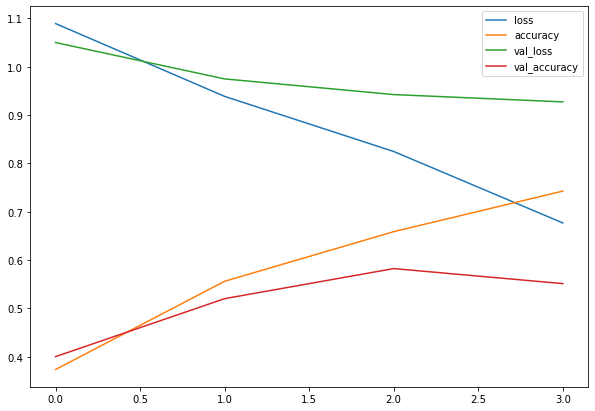

In [26]:
pd.DataFrame(history_the_best.history).plot(figsize=(10, 7))

In [27]:
%reload_ext tensorboard

In [30]:
%tensorboard --logdir=lab5/cnn

Reusing TensorBoard on port 6007 (pid 16406), started 0:04:05 ago. (Use '!kill 16406' to kill it.)

## За допомогою tensorboard можемо прослідкувати, що з епохами точність підвищується

In [19]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [18]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [33]:
resnet_url="https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5"
efficientnet_url="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [34]:
IMAGE_SHAPE=(224,224)

 ## У нижче наведеній функції маємо змінити кількість нейронів на 3, так як маємо три класи, а не один.

In [35]:
def create_BC_model(model_url):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    Dense(3, activation='sigmoid', name='output_layer') # create our own output layer      
  ])

  return model

## Resnet model

In [36]:
resnet_model= create_BC_model(resnet_url)
resnet_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
history_2 = resnet_model.fit(train_data, 
epochs=2, validation_data=valid_data, 
callbacks=[create_tensorboard_callback(dir_name="lab5", experiment_name="resnet")]
)


Saving TensorBoard log files to: lab5/resnet/20211125-120538
Epoch 1/2
24/24 [==============================] - 59s 2s/step - loss: 0.7701 - accuracy: 0.6987 - val_loss: 0.4707 - val_accuracy: 0.7911
Epoch 2/2
24/24 [==============================] - 56s 2s/step - loss: 0.2808 - accuracy: 0.8933 - val_loss: 0.3506 - val_accuracy: 0.8400


In [39]:
%reload_ext tensorboard
%tensorboard --logdir=lab5/resnet

Reusing TensorBoard on port 6009 (pid 16456), started 0:00:29 ago. (Use '!kill 16456' to kill it.)

## efficientnet model

In [37]:
# Create model
efficientnet_model = create_BC_model(efficientnet_url) # use EfficientNetB0 TensorFlow Hub URL
                                

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=valid_data,
                                              validation_steps=len(valid_data),
                                              callbacks=[create_tensorboard_callback(dir_name="lab5", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnet")])

Saving TensorBoard log files to: lab5/efficientnet/20211125-120853
Epoch 1/5
24/24 [==============================] - 39s 1s/step - loss: 0.7097 - accuracy: 0.7360 - val_loss: 0.4336 - val_accuracy: 0.8978
Epoch 2/5
24/24 [==============================] - 29s 1s/step - loss: 0.3157 - accuracy: 0.9240 - val_loss: 0.2965 - val_accuracy: 0.9156
Epoch 3/5
24/24 [==============================] - 27s 1s/step - loss: 0.2281 - accuracy: 0.9427 - val_loss: 0.2533 - val_accuracy: 0.9200
Epoch 4/5
24/24 [==============================] - 29s 1s/step - loss: 0.1898 - accuracy: 0.9480 - val_loss: 0.2358 - val_accuracy: 0.9244
Epoch 5/5
24/24 [==============================] - 27s 1s/step - loss: 0.1637 - accuracy: 0.9573 - val_loss: 0.2153 - val_accuracy: 0.9244


In [41]:
%reload_ext tensorboard
%tensorboard --logdir=lab5/efficientnet

Reusing TensorBoard on port 6010 (pid 16469), started 0:00:15 ago. (Use '!kill 16469' to kill it.)

## Маємо досить високу точність. Навіть краще ніж на resnet

## Resnet та sgd

In [43]:
resnet_model2= create_BC_model(resnet_url)
resnet_model2.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy']
)
history_4 = resnet_model2.fit(train_data, 
                epochs=5, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="lab5", experiment_name="resnet+sgd")]
)

Saving TensorBoard log files to: lab5/resnet+sgd/20211125-121347
Epoch 1/5
24/24 [==============================] - 70s 3s/step - loss: 0.6101 - accuracy: 0.7667 - val_loss: 0.3452 - val_accuracy: 0.8844
Epoch 2/5
24/24 [==============================] - 66s 3s/step - loss: 0.2622 - accuracy: 0.9093 - val_loss: 0.3267 - val_accuracy: 0.8756
Epoch 3/5
24/24 [==============================] - 64s 3s/step - loss: 0.2125 - accuracy: 0.9267 - val_loss: 0.2862 - val_accuracy: 0.8889
Epoch 4/5
24/24 [==============================] - 65s 3s/step - loss: 0.1670 - accuracy: 0.9453 - val_loss: 0.2995 - val_accuracy: 0.8844
Epoch 5/5
24/24 [==============================] - 63s 3s/step - loss: 0.1470 - accuracy: 0.9533 - val_loss: 0.3317 - val_accuracy: 0.8844


In [45]:
%reload_ext tensorboard
%tensorboard --logdir=lab5/resnet+sgd

Reusing TensorBoard on port 6006 (pid 16488), started 0:00:12 ago. (Use '!kill 16488' to kill it.)

## efficientnet та SGD

In [46]:
efficientnet_model2= create_BC_model(efficientnet_url)
efficientnet_model2.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy']
)
history_5 = efficientnet_model2.fit(train_data, 
                epochs=5, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="lab5", experiment_name="efficientnet+sgd")]
)

Saving TensorBoard log files to: lab5/efficientnet+sgd/20211125-121957
Epoch 1/5
24/24 [==============================] - 41s 1s/step - loss: 0.9116 - accuracy: 0.5987 - val_loss: 0.7329 - val_accuracy: 0.7467
Epoch 2/5
24/24 [==============================] - 32s 1s/step - loss: 0.5733 - accuracy: 0.8627 - val_loss: 0.5499 - val_accuracy: 0.8489
Epoch 3/5
24/24 [==============================] - 28s 1s/step - loss: 0.4342 - accuracy: 0.9013 - val_loss: 0.4615 - val_accuracy: 0.8889
Epoch 4/5
24/24 [==============================] - 30s 1s/step - loss: 0.3634 - accuracy: 0.9173 - val_loss: 0.4105 - val_accuracy: 0.9067
Epoch 5/5
24/24 [==============================] - 30s 1s/step - loss: 0.3182 - accuracy: 0.9253 - val_loss: 0.3738 - val_accuracy: 0.9111


In [48]:
%reload_ext tensorboard
%tensorboard --logdir=lab5/efficientnet+sgd

Reusing TensorBoard on port 6007 (pid 16509), started 0:00:09 ago. (Use '!kill 16509' to kill it.)

## Маємо досить високу точність

## 10 шарів resnet

In [49]:
for layer in resnet_model.layers[-10:]:
    layer.trainable=True

resnet_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

history_2_UPD = resnet_model.fit(train_data, 
                epochs=2, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="lab5", experiment_name="resnet_10l")]
)

Saving TensorBoard log files to: lab5/resnet_10l/20211125-122349
Epoch 1/2
24/24 [==============================] - 325s 13s/step - loss: 1.0680 - accuracy: 0.7893 - val_loss: 1162540544.0000 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 338s 14s/step - loss: 1.2375 - accuracy: 0.7467 - val_loss: 40128.3477 - val_accuracy: 0.3333


In [51]:
%reload_ext tensorboard
%tensorboard --logdir=lab5/resnet_10l

Reusing TensorBoard on port 6008 (pid 16563), started 0:00:12 ago. (Use '!kill 16563' to kill it.)

## Можемо прослідкувати незадовільний результат. Втрати великі

## 10 шарів та efficientnet

In [52]:
for layer in efficientnet_model.layers[-10:]:
    layer.trainable=True

efficientnet_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

history_3_UPD = efficientnet_model.fit(train_data, 
                epochs=2, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="lab5", experiment_name="efficientnet_10l")]
)

Saving TensorBoard log files to: lab5/efficientnet_10l/20211125-124055
Epoch 1/2
24/24 [==============================] - 150s 6s/step - loss: 0.4406 - accuracy: 0.8907 - val_loss: 0.5808 - val_accuracy: 0.9067
Epoch 2/2
24/24 [==============================] - 116s 5s/step - loss: 0.2147 - accuracy: 0.9787 - val_loss: 0.4945 - val_accuracy: 0.9333


In [54]:
%reload_ext tensorboard
%tensorboard --logdir=lab5/efficientnet_10l

Reusing TensorBoard on port 6009 (pid 16593), started 0:00:10 ago. (Use '!kill 16593' to kill it.)

## Можна зробити висновок, що точність досить висока як і на попередніх моделях з використанням efficientnet. 

# Висновок 
## У ході лабораторної роботи були розроблені різні моделі такі як СNN, Resnet  та Efficientent з використанням різних оптимізаторів, таких як sgd та Adam. 
## Якщо порівнювати отримані результати, то можна сказати, що Efficientent ращом з sgd показали найвищу точність навіть з використанням тільки 10 шарів. 